## Pet Classification Model Using CNN.

Project 2 

DESCRIPTION

Build a CNN model that classifies the given pet images correctly into dog and cat images. 
    
    
   The project scope document specifies the requirements for the project “Pet Classification Model Using CNN.” Apart from specifying the functional and nonfunctional requirements for the project, it also serves as an input for project scoping.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import glob
from keras import backend as k
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.optimizers import Adam 
from keras.models import Sequential
from keras.metrics import sparse_categorical_crossentropy
import cv2
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
path = ["train","test"]
dar = ["dogs",'cats']

In [29]:
def read(x,size):
    train =[]

    test = []

    for i in x:
        for j in dar:
            a1 = os.path.join("C:\\Users\\nilesh\\Desktop\\Master\\Deeplearning\\DL project 2\\data\\"+i+"\\"+j+"/*g")
            for img in glob.glob(a1):
                image = cv2.imread(img)
                im_resize = cv2.resize(image,(size,size), interpolation=cv2.INTER_CUBIC)
                train.append(im_resize)
                if j=="dogs":
                    test.append(0)
                else:
                    test.append(1)
    return np.array(train) , np.array(test)

In [30]:
x_train , y_train = read(["train"],28)
x_test , y_test = read(["test"],28)

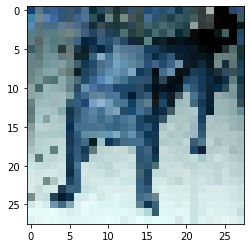

In [31]:
plt.imshow(x_train[0,:])

Assignment: Define the tensorflow model The model should have the following layers input later
conv layer 1 with 32 filters of kernel size[5,5],

pooling layer 1 with pool size[2,2] and stride 2

conv layer 2 with 64 filters of kernel size[5,5],

pooling layer 2 with pool size[2,2] and stride 2

dense layer whose output size is fixed in the hyper parameter: fc_size=32

drop out layer with droput probability 0.4

predict the class by doing a softmax on the output of the dropout layers Training
For training fefine the loss function and minimize it For evaluation calculate the accuracy Reading Material
For ideas look at tensorflow layers tutorial

In [163]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(1, 1), activation='relu',input_shape=(28,28,3)))
model.add(MaxPool2D(pool_size=(2,2) , strides=(2, 2),padding = "SAME"))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2) , strides=(2, 2),padding = "SAME"))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 24, 24, 32)        2432      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 32)                32800     
_________________________________________________________________
dropout_22 (Dropout)         (None, 32)              

In [164]:
call = [EarlyStopping(monitor = "val_accuracy", patience = 2 ,  mode="max")]

In [165]:
model.compile(Adam(lr=0.001), loss = "sparse_categorical_crossentropy" , 
              metrics = ["accuracy"])

In [172]:
model.fit(x_train/255., y_train, 
          validation_data=(x_test/255., y_test),
          epochs=30, callbacks=call,
          batch_size=1,
          verbose = 2)

Train on 40 samples, validate on 20 samples
Epoch 1/30
 - 0s - loss: 0.0099 - accuracy: 1.0000 - val_loss: 1.8227 - val_accuracy: 0.5000
Epoch 2/30
 - 0s - loss: 0.0238 - accuracy: 1.0000 - val_loss: 1.7371 - val_accuracy: 0.5500
Epoch 3/30
 - 0s - loss: 0.0477 - accuracy: 0.9750 - val_loss: 1.4918 - val_accuracy: 0.6500
Epoch 4/30
 - 0s - loss: 0.0071 - accuracy: 1.0000 - val_loss: 1.8156 - val_accuracy: 0.7500
Epoch 5/30
 - 0s - loss: 6.9335e-04 - accuracy: 1.0000 - val_loss: 1.8394 - val_accuracy: 0.7500
Epoch 6/30
 - 0s - loss: 0.0072 - accuracy: 1.0000 - val_loss: 1.8830 - val_accuracy: 0.5500


In [173]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,model.predict_classes(x_test/255))

array([[5, 5],
       [4, 6]], dtype=int64)

In [174]:
confusion_matrix(y_train,model.predict_classes(x_train/255))

array([[20,  0],
       [ 0, 20]], dtype=int64)